# Curve Fit and Visualization with Python
---
>Take the example of D8B lab: [`数字图像处理`](http://lovephysics.sysu.edu.cn/lib/exe/fetch.php?media=courses:modernphysicslabzhuhai:lecture-d8-2-2016.pdf)
---

author: Xishui Tian 16350065

---

This notebook shows how to use curve_fit function from scipy module to
fit user-defined function, gaussian function in this case, with experiment
data and save the fit parameters(sigma) into .csv files.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-Import" data-toc-modified-id="Basic-Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic Import</a></span></li><li><span><a href="#Define-Fit-Function-and-Write-to-file-function" data-toc-modified-id="Define-Fit-Function-and-Write-to-file-function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define Fit Function and Write-to-file function</a></span></li><li><span><a href="#Curve-Fit-and-Plot" data-toc-modified-id="Curve-Fit-and-Plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Curve Fit and Plot</a></span></li></ul></div>

## Basic Import

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm
from scipy.optimize import curve_fit
plt.style.use("classic")
%matplotlib inline 


## Define Fit Function and Write-to-file function

In [262]:
def gaus(x, a, x0, sigma, offset):   
    # for curve_fir use, user-defined function
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + offset


def sigma2D(fname, output):  
    # calculate 2-D sigma, x and y direction, respectively and write to a file
    with open(output, "w") as f:
        f.write('')   # overwrite output file to empty
        
    for i in fname:
        data = np.genfromtxt(f"{i}", delimiter=',') 
        poptx, pcovx = curve_fit(gaus, np.arange(data.shape[1]), np.sum(data, axis=0))
        popty, pcovy = curve_fit(gaus, np.arange(data.shape[0]), np.sum(data, axis=1), p0=poptx)
        # print(f"The {i}-th lab: sigma_x={abs(poptx[2]):5f}, sigma_y={abs(popty[2]):5f} ")
        print(f"Writing data to {output}......", end="")
        with open(output, "a") as f:
            f.write(f"{abs(poptx[2]):4f}, {abs(popty[2]):4f}\n")
            print("Write successfully!")
    
# Example usage: sigma2D([f"{i}.csv" for i in range(1, 14)], "d8b1.csv")


## Curve Fit and Plot

[ 399.50190747   28.40309508   -7.59196697   -5.07958208]


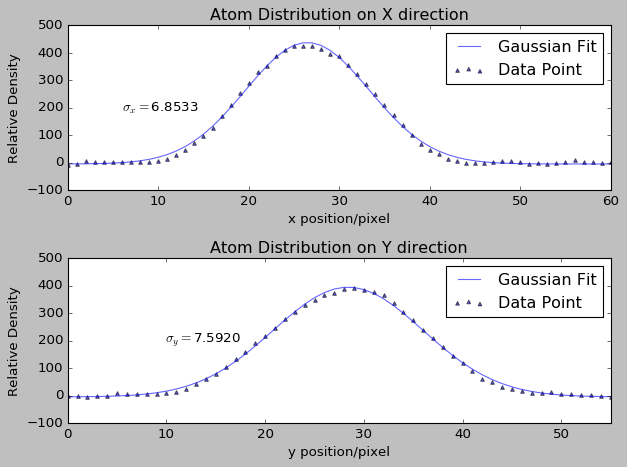

In [199]:
ca1 = np.genfromtxt("315_01.csv", delimiter=',')  #cold atom clouds NO.1
xx = np.arange(ca1.shape[1])
yy = np.arange(ca1.shape[0])
X, Y = np.meshgrid(xx, yy)

# ------------plot 2-D contour surface figure--------------------
# plt.contourf(X, Y, ca1, cmap=cm.autumn)
# plt.colorbar()
# plt.title("Absorbtion Imaging")
# plt.savefig("d8b_1.png", dpi=450)

# -----------plot 3-D surface figure---------------------------
# plt.style.use("default")
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(X, Y, ca1, cmap=cm.coolwarm)
# fig.colorbar(surf, shrink=0.5, aspect=7)
# plt.savefig("d8b_1_3D.png", dpi=450)

# -----------plot x, y direction distribution figure----------------
# curve fit first

poptx, pcovx = curve_fit(gaus, xx, np.sum(ca1, axis=0))
popty, pcovy = curve_fit(gaus, yy, np.sum(ca1, axis=1), p0=poptx)
temp_x = gaus(xx, *poptx)
temp_y = gaus(yy, *popty)
print(f"{popty}")


plt.style.use("classic")
fig = plt.figure()


ax1 = fig.add_subplot(211)
xscatter = ax1.scatter(xx, np.sum(ca1, axis=0), marker='^', s=10, alpha=0.6, label="Data Point")
xline = ax1.plot(xx, temp_x, linewidth=1, alpha=0.6, label="Gaussian Fit")
ax1.legend()
ax1.set_title("Atom Distribution on X direction")
ax1.set_xlabel("x position/pixel")
ax1.set_ylabel("Relative Density")caca
ax1.text(0.17, 0.5, fr"$\sigma_x=${abs(poptx[2]):.4f}", horizontalalignment='center',
         verticalalignment='center', transform=ax1.transAxes)
ax1.set_xlim(0, xx[-1])


ax2 = fig.add_subplot(212)
yscatter = ax2.scatter(yy, np.sum(ca1, axis=1), marker='^', s=10, alpha=0.6, label="Data Point")
yline = ax2.plot(yy, temp_y, linewidth=1, alpha=0.6, label="Gaussian Fit")
ax2.legend()
ax2.set_title("Atom Distribution on Y direction")
ax2.set_xlabel("y position/pixel")
ax2.set_ylabel("Relative Density")
ax2.text(0.25, 0.5, fr"$\sigma_y=${abs(popty[2]):.4f}", horizontalalignment='center',
         verticalalignment='center', transform=ax2.transAxes)
ax2.set_xlim(0, yy[-1])


fig.tight_layout()
plt.savefig("d8b_xy.png", dpi=600)